In [1]:
import imageio
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
from PIL import Image


In [2]:
signal.medfilt

<function scipy.signal._signaltools.medfilt(volume, kernel_size=None)>

In [3]:
def get_image(i):
    im = imageio.imread('test_images2/generated_images/' + str(i) + '.png')
    box_blur = (1/9.0) * np.array([[1,1,1],[1,1,1],[1,1,1]])
    new_im = np.zeros((256, 256, 4))
    for i in range (4):
        out = signal.medfilt(im[:,:,i])
        new_im[:,:,i] = np.round(out).astype(np.uint8)

    new_im = new_im.astype(np.uint8)

    return new_im


In [15]:
im = imageio.imread('test_images2/generated_images/' + str(6743) + '.png')

/var/folders/s0/mc6fh4zj1tbf17y2y7tyhf800000gn/T/ipykernel_20632/1501481997.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('test_images2/generated_images/' + str(6743) + '.png')


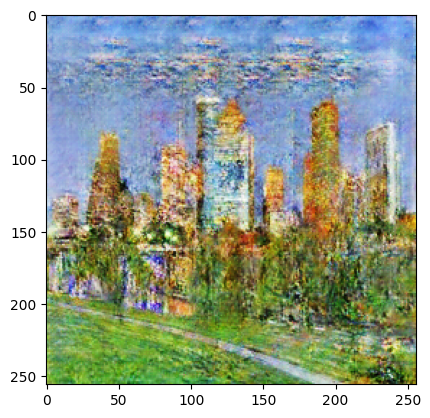

In [16]:
from matplotlib import pyplot as plt
plt.imshow(im)
plt.show()

In [6]:
new_im = get_image(6743)

/var/folders/s0/mc6fh4zj1tbf17y2y7tyhf800000gn/T/ipykernel_20632/2328025362.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('test_images2/generated_images/' + str(i) + '.png')


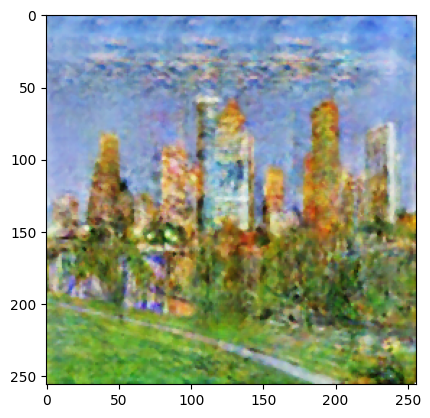

In [7]:
from matplotlib import pyplot as plt
plt.imshow(new_im)
plt.show()

In [9]:
for i in range (1, 7039):
    new_im = get_image(i)
    im = Image.fromarray(new_im)
    im.save("local_medians_generated/images/" + str(i) + ".png")

/var/folders/s0/mc6fh4zj1tbf17y2y7tyhf800000gn/T/ipykernel_20632/2328025362.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('test_images2/generated_images/' + str(i) + '.png')


In [10]:
import tensorflow as tf

In [11]:
new_model = tf.keras.models.load_model('classification_model.h5')

2022-12-06 16:44:52.191978: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-06 16:44:52.192134: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



In [12]:
def get_predictions(file_path, model):
    img_array = tf.keras.utils.image_dataset_from_directory(
                file_path)
    predictions = model.predict(img_array)
    predicted_labels = []
    for prediction in predictions:
        predicted_labels.append(np.argmax(prediction))
    return predicted_labels
    
    

In [13]:
local_means = get_predictions("local_medians_generated", new_model)

Found 7038 files belonging to 1 classes.


2022-12-06 16:44:52.937493: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-06 16:44:52.937547: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [14]:
local_means.count(0) / (len(local_means))

0.8131571469167377